In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")

def prepare_df(df):
    df.dropna(subset=[2], inplace=True)
    df.columns = df.iloc[0]
    df = df[1:]
    return df


def plot_results(df, save_name):
    selected_rows = ["inaccurate", "wrong", "correct"]
    df_transposed = df.transpose()
    df_filtered = df_transposed.loc[selected_rows]
    rows_to_plot = ["HCC", "mCRC", "PACA"]

    palette = sns.color_palette("Blues", n_colors=len(selected_rows))

    for row in rows_to_plot:
        fig = plt.figure(figsize=(3,3))
        ax = sns.barplot(x=df_filtered.index, y=df_filtered[row], palette=palette, edgecolor="black")

        sns.despine(top=True)

        for p in ax.patches:
            ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha="center", va="center", xytext=(0, 10), textcoords="offset points", size=12)
        
        ax.tick_params(axis="x", labelsize=12)
        ax.tick_params(axis="y", labelsize=12)
        plt.xlabel("")
        # plt.ylabel("Number of statements")
        # plt.title(f"Distribution of Correct and Wrong Predictions for {row}")
        plt.title(row)
        plt.ylabel("")
        ax.set_ylim(0., 80)
        fig.savefig(f"{os.getcwd()}/{save_name}_{row}.svg", format="svg", dpi=300, bbox_inches="tight")

In [35]:
df = pd.read_excel('GPT4_RAG_Raw_Results.xlsx', engine='openpyxl', header=None)

row_indices = df[df[0].astype(str).str.startswith('Query')].index.tolist()
row_indices # split on these
first = df[1: row_indices[1]]
second = df[row_indices[1]: row_indices[2]]
third = df[row_indices[2]:]
first = prepare_df(first)
second = prepare_df(second)
third = prepare_df(third)
print(first["Consensus evaluation"].value_counts())
print(second["Consensus evaluation"].value_counts())
print(third["Consensus evaluation"].value_counts())
hcc = first["Consensus evaluation"].value_counts()
mcrc = second["Consensus evaluation"].value_counts()
paca = third["Consensus evaluation"].value_counts()

ALL = hcc.add(mcrc, fill_value=0).add(paca, fill_value=0)

df = pd.DataFrame({
    "Type": ["ALL", "HCC", "mCRC", "PACA"],
    "Counts": [ALL, hcc, mcrc, paca]
})

df = df.set_index('Type').Counts.apply(pd.Series)
df.fillna(0, inplace=True)
df.to_csv("scores_GPT4_RAG.csv")

Consensus evaluation
correct       60
inaccurate    10
wrong          1
Name: count, dtype: int64
Consensus evaluation
correct       62
inaccurate    10
wrong          3
Name: count, dtype: int64
Consensus evaluation
correct       62
inaccurate    10
Name: count, dtype: int64


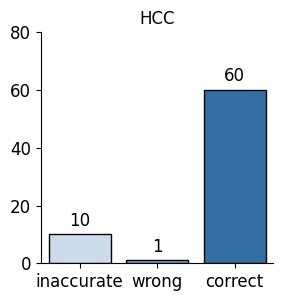

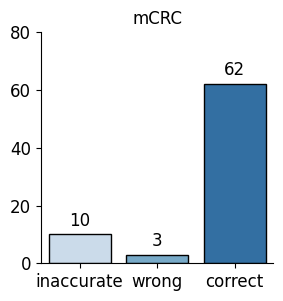

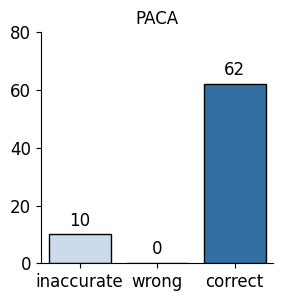

In [37]:
plot_results(df, "RAG")

In [45]:
df = pd.read_excel('GPT4_noRAG_Raw_Results.xlsx', engine='openpyxl', header=None)
row_indices = df[df[0].astype(str).str.startswith('Query')].index.tolist()
row_indices # split on these
first = df[1: row_indices[1]]
second = df[row_indices[1]: row_indices[2]]
third = df[row_indices[2]:]
first = prepare_df(first)
second = prepare_df(second)
third = prepare_df(third)
print(first["Consensus evaluation"].value_counts())
print(second["Consensus evaluation"].value_counts())
print(third["Consensus evaluation"].value_counts())
hcc = first["Consensus evaluation"].value_counts()
mcrc = second["Consensus evaluation"].value_counts()
paca = third["Consensus evaluation"].value_counts()

ALL = hcc.add(mcrc, fill_value=0).add(paca, fill_value=0)

df = pd.DataFrame({
    "Type": ["ALL", "HCC", "mCRC", "PACA"],
    "Counts": [ALL, hcc, mcrc, paca]
})

df = df.set_index('Type').Counts.apply(pd.Series)
df.fillna(0, inplace=True)
df.to_csv("scores_GPT4_noRAG.csv")

Consensus evaluation
correct       28
wrong         16
inaccurate     4
Name: count, dtype: int64
Consensus evaluation
correct       34
wrong         12
inaccurate     8
Name: count, dtype: int64
Consensus evaluation
correct       31
inaccurate    17
wrong         13
Name: count, dtype: int64


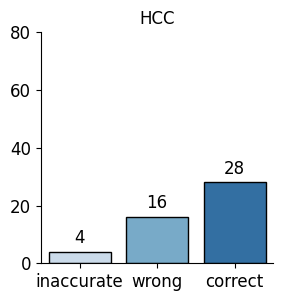

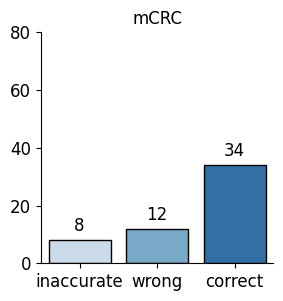

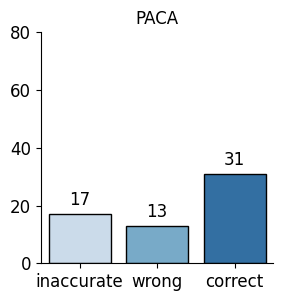

In [46]:
plot_results(df, "NoRAG")

In [42]:
row_indices

[1, 177, 362]